In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #sets grid for plot
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates #for plotting with dates
from mpl_toolkits import mplot3d
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx #pulls up shapefiles for plotting map
import matplotlib.pylab as pylab
# import geoplot

In [3]:


ec_taxa = pd.read_excel("/D/MIT-WHOI/data/2021/EcoMon_Plankton_Data_v3_7_dnd.xlsx",
             sheet_name = 1)

ec_data = pd.read_excel("/D/MIT-WHOI/data/2021/EcoMon_Plankton_Data_v3_7_dnd.xlsx",
             sheet_name = 2)
ec_data["date"] = pd.to_datetime(ec_data["date"], format ="%Y-%m-%d" )
ec_data["year"] = pd.to_numeric(ec_data["date"].dt.year)

# print(ec_taxa.head())
ec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32206 entries, 0 to 32205
Columns: 290 entries, cruise_name to year
dtypes: datetime64[ns](1), float64(282), int64(3), object(4)
memory usage: 71.3+ MB


reading in shapefile from NCEAS see link below
https://www.marineregions.org/gazetteer.php?p=details&id=8551



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    1 non-null      float64 
 1   lme_name    1 non-null      object  
 2   grouping    0 non-null      object  
 3   arctic      0 non-null      object  
 4   uslmes      1 non-null      object  
 5   shape_leng  1 non-null      float64 
 6   shape_area  1 non-null      float64 
 7   sum_gis_km  1 non-null      float64 
 8   mrgid       1 non-null      float64 
 9   minlat      1 non-null      float64 
 10  minlong     1 non-null      float64 
 11  maxlat      1 non-null      float64 
 12  maxlong     1 non-null      float64 
 13  lat         1 non-null      float64 
 14  lon         1 non-null      float64 
 15  lme_number  1 non-null      float64 
 16  geometry    1 non-null      geometry
dtypes: float64(12), geometry(1), object(4)
memory usage: 264.0+ bytes


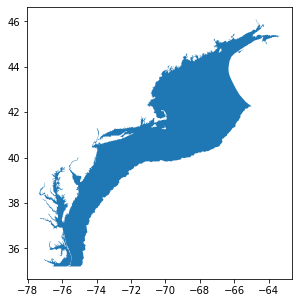

In [4]:
nes = gpd.read_file("/D/MIT-WHOI/data/2021/lme/lme.shp")
fig,ax = plt.subplots(figsize = (5,5))
nes.plot(ax = ax)
nes.info()

In [95]:
geometry = [Point(xy) for xy in zip(ec_data["lon"],ec_data["lat"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(ec_data,crs =crs,geometry =geometry)

geo_df[geo_df.lat == 40].head()

print("Abiotic Variables: ",list(geo_df)[1:14])
# print("Biotic Variables: ",list(geo_df)[14:])

Abiotic Variables:  ['station', 'zoo_gear', 'ich_gear', 'lat', 'lon', 'date', 'time', 'depth', 'sfc_temp', 'sfc_salt', 'btm_temp', 'btm_salt', 'volume_1m2']


In [33]:
#Contextily Providers
print(ctx.providers.keys()) #set provider for basemap
print(ctx.providers.Esri.keys()) #Esri is a provider and has different styles of basemap
# ctx.providers.OpenSeaMap.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])
dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas'])


Text(111.375, 0.5, 'Latitude')

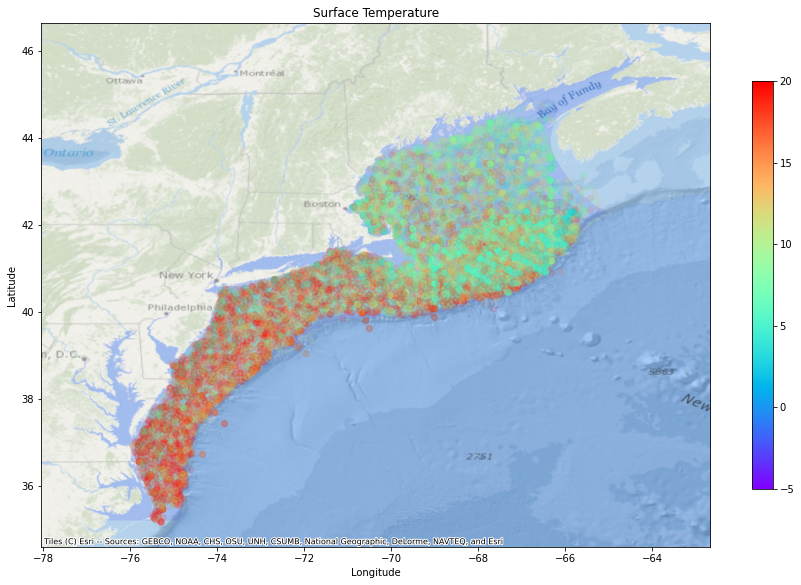

In [113]:
fig,ax = plt.subplots(figsize = (15,15))

nes.plot(ax = ax, alpha = 0.1, color = "blue") #plots shapefile

ax = geo_df.plot(column = 'sfc_temp',ax=ax,
                 alpha = 0.1,
                 cmap = "rainbow",
                 marker = "o",
                legend = True,
                vmin = -5,
                vmax = 20,
                legend_kwds = {'shrink':0.5}) 

ctx.add_basemap(ax,crs= geo_df.crs.to_string(),
                source = ctx.providers.Esri.OceanBasemap) #plots basemap behind shapefile

plt.title("Surface Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Depth across the shelf

Text(0.5, 1.0, 'Bottom Depth')

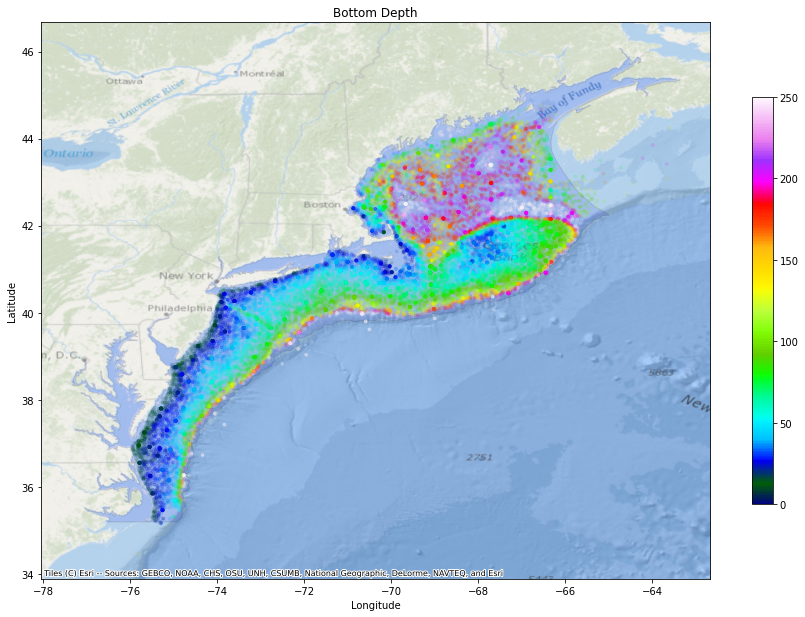

In [124]:
fig,ax = plt.subplots(figsize = (15,15))

nes.plot(ax = ax, alpha = 0.1, color = "blue",edgecolor = "k")


# color_map = plt.cm.get_cmap('GnBu')
# reversed_color_map = color_map.reversed()# reverse the `Colormap`
# colorbar = plt. colorbar()


ax = geo_df.plot(column = 'depth',ax=ax,alpha = 0.1,
                 markersize = 8,
                 marker = "o",label = "s",
                 cmap = "gist_ncar",
                 legend = True,
                legend_kwds = {'shrink':0.5},
                 vmin = 0, vmax = 250)
ctx.add_basemap(ax,crs= geo_df.crs.to_string(),source = ctx.providers.Esri.OceanBasemap)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Bottom Depth")





Text(111.375, 0.5, 'Latitude')

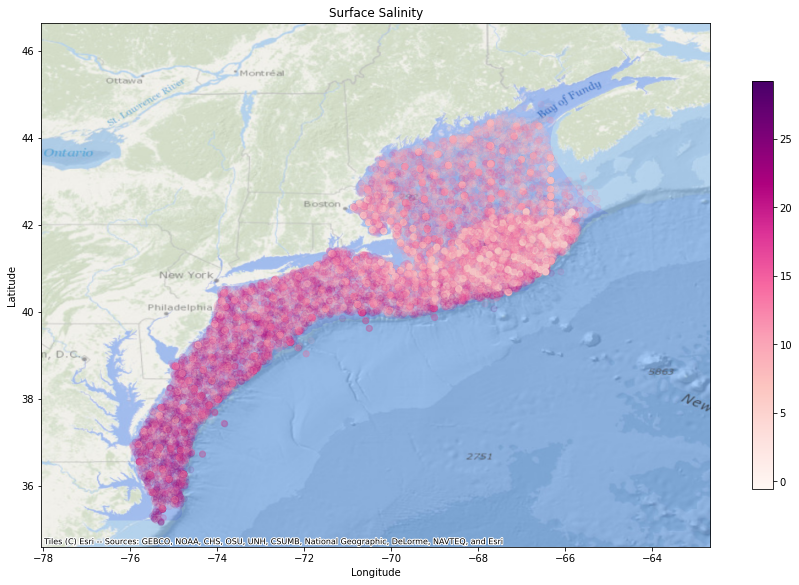

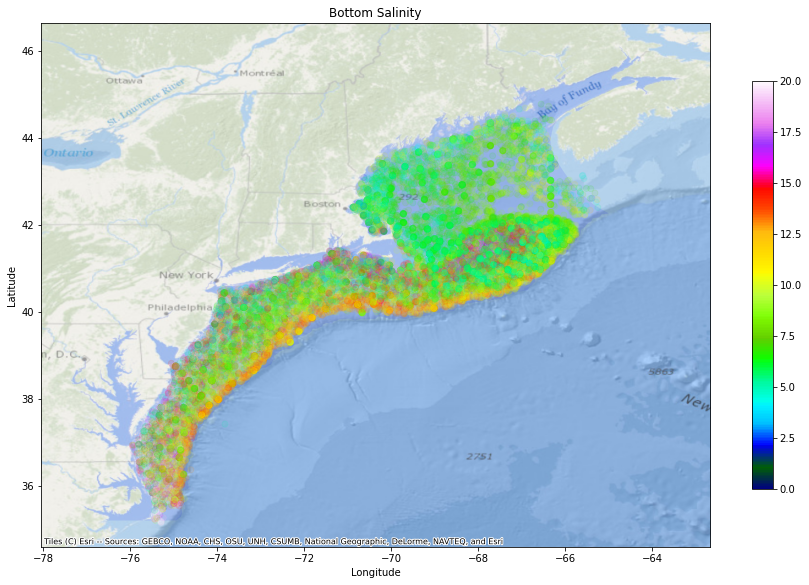

In [143]:
fig,ax = plt.subplots(figsize = (15,15))

nes.plot(ax = ax, alpha = 0.1, color = "blue") #plots shapefile

ax = geo_df.plot(column = 'sfc_temp',ax=ax,
                 alpha = 0.1,
                 cmap = "RdPu",
                 marker = "o",
                legend = True,
#                 vmin = -5,
#                 vmax = 20,
                legend_kwds = {'shrink':0.5}) 

ctx.add_basemap(ax,crs= geo_df.crs.to_string(),
                source = ctx.providers.Esri.OceanBasemap) #plots basemap behind shapefile

plt.title("Surface Salinity",)
plt.xlabel("Longitude")
plt.ylabel("Latitude")


fig,ax = plt.subplots(figsize = (15,15))

nes.plot(ax = ax, alpha = 0.1, color = "blue") #plots shapefile


ax = geo_df.plot(column = 'btm_temp',ax=ax,
                 alpha = 0.1,
                 cmap = "gist_ncar",
                 marker = "o",
                legend = True,
                vmin = 0,
                vmax = 20,
                legend_kwds = {'shrink':0.5}) 

ctx.add_basemap(ax,crs= geo_df.crs.to_string(),
                source = ctx.providers.Esri.OceanBasemap) #plots basemap behind shapefile

plt.title("Bottom Salinity",)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Isolating NES-LTER Transect

Text(111.375, 0.5, 'Latitude')

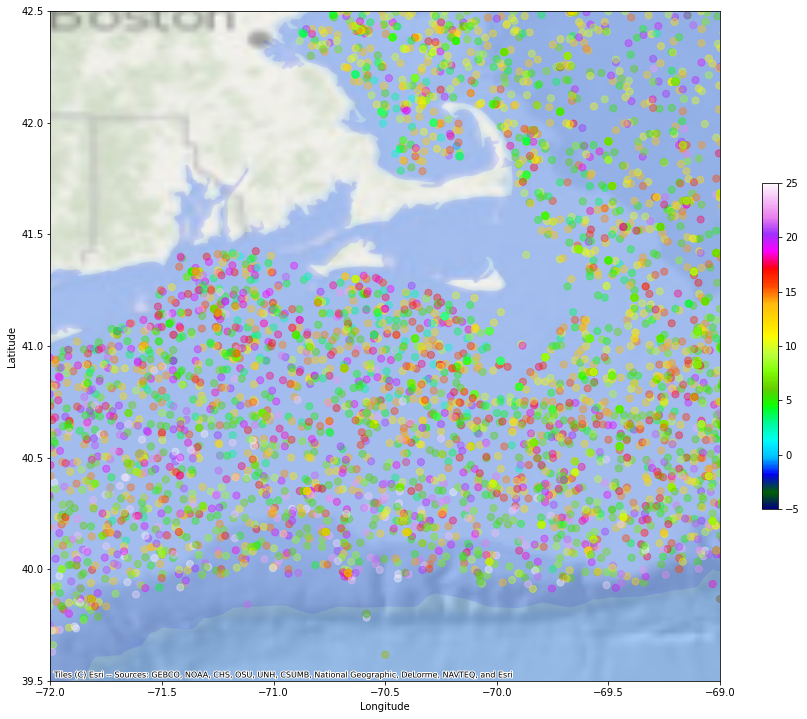

In [138]:
fig,ax = plt.subplots(figsize = (15,15))

nes.plot(ax = ax, alpha = 0.1, color = "blue")#plots shapefile

conditions = (geo_df.lat >= 39.5) & (geo_df.lat <= 42.5)

ax = geo_df[conditions].plot( column = "sfc_temp",
                            ax=ax, #plots data
                             markersize =50,
                             alpha = 0.4,
                             marker = "o",
                            label = "s",
                             cmap = "gist_ncar" ,
                            legend = True,
                            vmin = -5,
                            vmax = 25,
                             legend_kwds = {'shrink':0.4}
)

ctx.add_basemap(ax,crs= geo_df.crs.to_string(),
                source = ctx.providers.Esri.OceanBasemap) #plots basemap behind shapefile
ax.set_xlim(-72, -69)
ax.set_ylim(39.5,42.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

aggregate by isobath and latitude? or latitude and bottom depth